In [239]:
# Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная)
# (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
#Определить наиболее значимые переменные которые влияют на выживаемость. 
#Визуализировать дерево решений. 

#1. Как влияет размер семьи  на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет).
#2. Как влияет пол/возраст/номер палубы. 

#Ksenia
#19/01/24
#v.01

In [240]:
#PassengerId - Идентификатор пассажира
#Survived - Признак выживания (1 - выжил, 0 - не выжил)
#Pclass - Класс билета (1, 2 или 3)
#Name - Имя пассажира
#Sex - Пол пассажира
#Age - Возраст пассажира
#SibSp - Количество братьев/сестер или супругов на борту
#Parch - Количество родителей или детей на борту
#Ticket - Номер билета
#Fare - Стоимость билета
#Cabin - Номер каюты
#Embarked - Порт посадки (C - Шербур, Q - Квинстаун, S - Саутгемптон)

In [241]:

import numpy as np
import pandas as pd

df_1 = pd.read_csv('titanic_train.csv', sep=';', encoding='utf8')
df_2 = pd.read_csv('titanic_test.csv', sep=';', encoding='utf8')

In [242]:
#объединяем 2 таблицы по вертикали
df = pd.concat([df_1, df_2], ignore_index=True)

In [243]:
#Обработка пропусков и изменение типа данных
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


In [244]:
mean_Age = df['Age'].mean()
df['Age'].fillna(mean_Age, inplace=True)
mean_survived = df['Survived'].mode().iloc[0]
df['Survived'].fillna(mean_survived, inplace=True)
mean_Fare = df['Fare'].median()
mean_Fare= df['Fare'].fillna(mean_Fare, inplace=True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [246]:
df = df.drop(labels=['Cabin','Name','Ticket'], axis=1)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.2+ KB


In [248]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.261268,2.294882,29.995796,0.498854,0.385027,39.588353
std,378.020061,0.439494,0.837836,12.840299,1.041658,0.865560,49.367049
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,23.000000,0.000000,0.000000,24.150000
50%,655.000000,0.000000,3.000000,29.995796,0.000000,0.000000,26.250000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [249]:
#Статистика  выживших -1 /умерших-0 пассажиров:
df.groupby('Survived')['Sex'].count()

Survived
0.0    967
1.0    342
Name: Sex, dtype: int64

In [250]:
#Статистика по полу среди всех пассажиров:
df.groupby('Sex')['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [251]:
# Статистика выживших по полу
df.groupby('Sex')['Survived'].sum() # среди выживших больше оказалось лиц женского пола

Sex
female    233.0
male      109.0
Name: Survived, dtype: float64

In [252]:
#Распределение людей по классу билета
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

In [253]:
#Статистика выживших по классу битела и полу
survival_distribution = df.groupby(['Pclass', 'Sex'])['Survived'].sum().reset_index()  # в 1 классе выжило больше, особенно женщин

In [254]:
survival_distribution

,Pclass,Sex,Survived
0,1,female,91.0
1,1,male,45.0
2,2,female,70.0
3,2,male,17.0
4,3,female,72.0
5,3,male,47.0


In [255]:
# Подсчет общего количества пассажиров по SibSp
total_by_sibsp = df.groupby('SibSp')['PassengerId'].count()

In [256]:
total_by_sibsp

SibSp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: PassengerId, dtype: int64

In [257]:
# Подсчет количества выживших по SibSp
survived_by_sibsp = df.groupby('SibSp')['Survived'].sum()
# количество выживших родственников: те,кто путешествовал в одиночку выжило больше (210). Соответсвенно,чем больше количество  членов семьи- тем меньше выживаемость

In [258]:
survived_by_sibsp

SibSp
0    210.0
1    112.0
2     13.0
3      4.0
4      3.0
5      0.0
8      0.0
Name: Survived, dtype: float64

In [259]:
# Подсчет общего количества пассажиров по Parch
total_by_Parch = df.groupby('Parch')['PassengerId'].count()

In [260]:
total_by_Parch

Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: PassengerId, dtype: int64

In [261]:
# Подсчет количества выживших по Parch
survived_by_Parch = df.groupby('Parch')['Survived'].sum()

In [262]:
survived_by_Parch

Parch
0    233.0
1     65.0
2     40.0
3      3.0
4      0.0
5      1.0
6      0.0
9      0.0
Name: Survived, dtype: float64

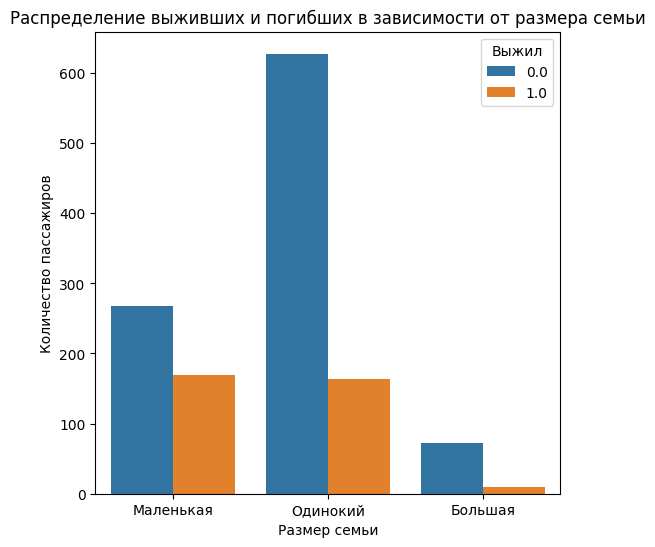

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
# Создание нового признака "FamilySize" - размер семьи
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 для учета самого пассажира

# Создание категорий для размера семьи (одиночные, маленькие, средние, большие)
def family_size_category(size):
    if size == 1:
        return 'Одинокий'
    elif 2 <= size <= 4:
        return 'Маленькая'
    elif size > 4:
        return 'Большая'

df['FamilySizeCategory'] = df['FamilySize'].apply(family_size_category)

# Построение графика
plt.figure(figsize=(6, 6))
sns.countplot(x='FamilySizeCategory', hue='Survived', data=df)
plt.title('Распределение выживших и погибших в зависимости от размера семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжил')
plt.show()

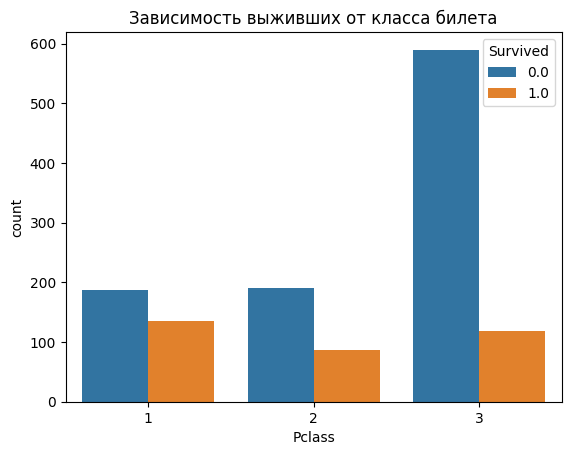

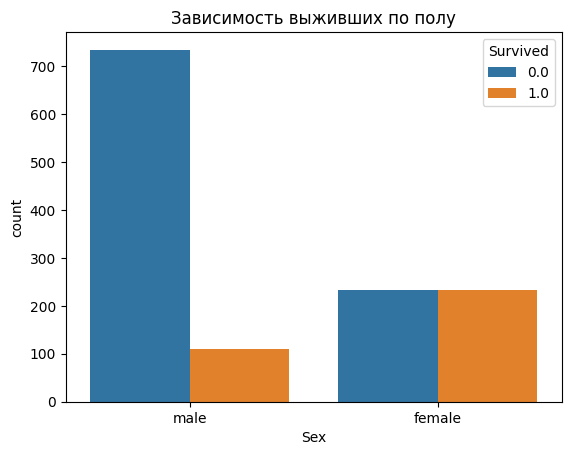

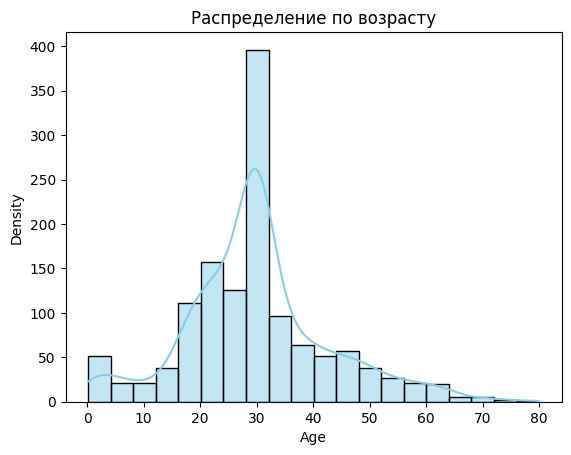

In [264]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Зависимость выживших от класса билета')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Зависимость выживших по полу')
plt.show()


sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение по возрасту')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

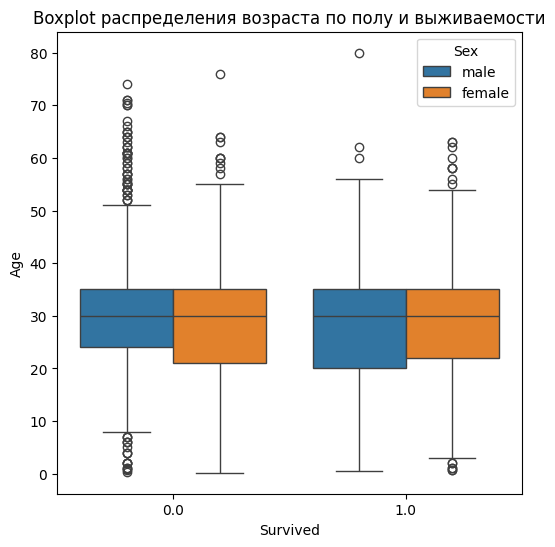

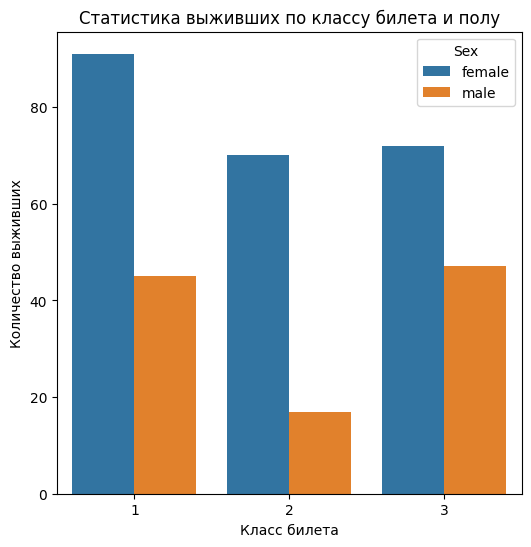

In [265]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)
plt.title('Boxplot распределения возраста по полу и выживаемости')
plt.show()

plt.figure(figsize=(6, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=survival_distribution)
plt.title('Статистика выживших по классу билета и полу')
plt.xlabel('Класс билета')
plt.ylabel('Количество выживших')
plt.show()

In [266]:
#Основной вывод по данным: 
1. Cреди общего количества пассажиров (1309), больше всего путешествовало по классу билета №3 (составило 709 человек).
2. На борту количество отдыхающих мужчин составило 843 (выжило 109), женщин - 466 (выжило 233)
3. Большинство пассажиров (891) путешествовали без братьев, сестер или супругов, 319 пассажиров имели одного брата, сестру или супруга, и так далее.
Из 210 пассажиров без братьев, сестер или супругов (SibSp=0), 112 выжили. Следовательно, с увеличением количества братьев, сестер или супругов на борту, процент выживаемости снижается.
4. Среди путешествующих 1002 человека отдыхали без детей/родителей. На борту семей с 3 и более детьми составило минимальное количество. 
Из 233 пассажиров без родителей или детей на борту (Parch=0), 65 выжили. При наличии одного родителя или ребенка (Parch=1), также наблюдается относительно высокий процент выживаемости.
С увеличением числа родителей или детей на борту процент выживаемости снижается.
5. Процент выживших в классе №1 больше (умерших больше составило в классе №3). Выжило больше лиц женского пола по всех классах. Диапозон выживших по возрасту составил 20-35 лет.

SyntaxError: invalid character '№' (U+2116) (3837180573.py, line 2)

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Обработка категориальных признаков
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
predictions = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))


Accuracy: 0.7824427480916031
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       189
         1.0       0.69      0.40      0.50        73

    accuracy                           0.78       262
   macro avg       0.75      0.66      0.68       262
weighted avg       0.77      0.78      0.76       262



In [ ]:
from sklearn.model_selection import GridSearchCV
params = [ {'max_depth': list( range(1, 20) )} ]
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy',cv=5 ,return_train_score = False )
gs.fit( X, y )

In [ ]:
import matplotlib.pyplot as plt
plt.errorbar(range(1, 20), gs.cv_results_['mean_test_score'], gs.cv_results_['std_test_score'])
plt.grid()

In [267]:
gs.best_params_

{'max_depth': 2}

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Преобразование категориальных признаков в числовые
label_encoder = LabelEncoder()
X.loc[:, 'Sex'] = label_encoder.fit_transform(X['Sex'])


# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
clf = DecisionTreeClassifier(random_state=42,  max_depth=2)
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

# Оценка классификации
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)



Accuracy: 0.77863
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       189
         1.0       0.64      0.47      0.54        73

    accuracy                           0.78       262
   macro avg       0.73      0.68      0.70       262
weighted avg       0.77      0.78      0.77       262



In [281]:
# Важность признаков
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [282]:
feature_importances

,feature,importance
1,Sex,0.703792
0,Pclass,0.203597
2,Age,0.092611
3,SibSp,0.000000
4,Parch,0.000000
5,Fare,0.000000


In [283]:
plt.subplots(nrows = 1,ncols = 1,figsize = (30,15), dpi=600)
tree.plot_tree(clf, max_depth=2,
               feature_names = list(X), 
               class_names=['Not Survived', 'Survived'], fontsize=14,
               filled = True);

In [277]:
from sklearn.metrics import confusion_matrix

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[170  19]
 [ 39  34]]


In [284]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
# После обучения модели и получения прогнозов вероятности
y_prob = clf.predict_proba(X_test)[:, 1]

# Рассчет ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc:.5f}')


ROC-AUC: 0.75748


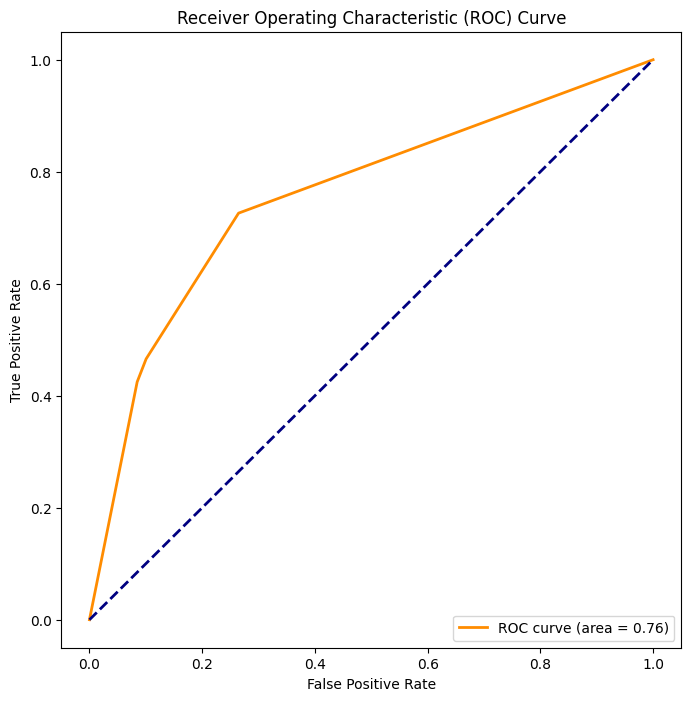

In [285]:
# Рассчет значения false positive rate и true positive rate
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Рассчет площади под кривой ROC
roc_auc = auc(fpr, tpr)

# Построение кривой ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11744\2722432079.py:23: RuntimeWarning:

invalid value encountered in divide



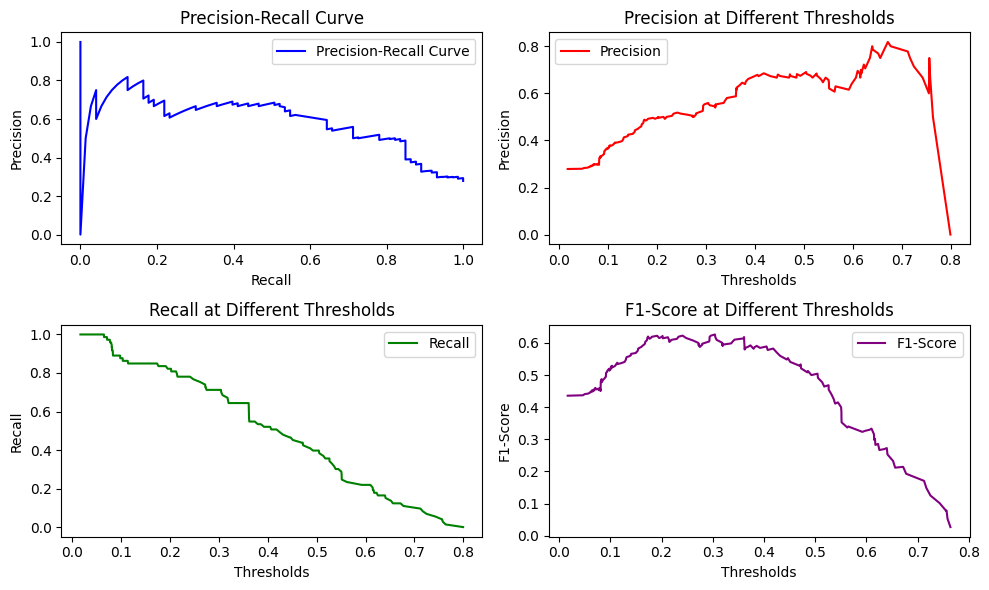

In [290]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Подготовка данных
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Обработка категориальных признаков
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# вероятность принадлежности классу 1 (выжил) для каждого объекта
y_scores = model.predict_proba(X_test)[:, 1]

# Получили precision, recall и thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Получите F1-меру
f1 = 2 * (precision * recall) / (precision + recall)

# Постройте графики
plt.figure(figsize=(10, 6))

# График Precision-Recall
plt.subplot(2, 2, 1)
plt.plot(recall, precision, label='Precision-Recall Curve', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# График Precision
plt.subplot(2, 2, 2)
plt.plot(thresholds, precision[:-1], label='Precision', color='r')
plt.xlabel('Thresholds')
plt.ylabel('Precision')
plt.title('Precision at Different Thresholds')
plt.legend()

# График Recall
plt.subplot(2, 2, 3)
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Thresholds')
plt.ylabel('Recall')
plt.title('Recall at Different Thresholds')
plt.legend()

# График F1-меры
plt.subplot(2, 2, 4)
plt.plot(thresholds, f1[:-1], label='F1-Score', color='purple')
plt.xlabel('Thresholds')
plt.ylabel('F1-Score')
plt.title('F1-Score at Different Thresholds')
plt.legend()

plt.tight_layout()
plt.show()
